In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # we will use this library for --> (mode, skew, kurtosis, iqr)

In [4]:
df_2021 = pd.read_csv("world-happiness-report-2021.csv")

In [5]:
df1_2021= df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy()

In [6]:
df1_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [7]:
df1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


## Basic Score Explanations of the Variables:
- **Ladder score**: Happiness score. 0 lowest, 10 maximum
- **Social Support**: Perceived social support score 0 lowest, 10 maximum
- **Freedom to make life choices**: Perceived freedom of expression 0 lowest, 10 maximum
- **Perceptions of corruption**: Perceived corruption and kind of distrust in institutions 0 lowest, 10 maximum distrust

In [8]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


### For the sake of the learning the concepts in depht we will first focus on only 'Ladder score' variable

In [9]:
df1_2021["Ladder score"].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

ya ortalamaya dayanan yaklaşımla bakacağız ya orta değere dayanan yaklaşımla

ya mean based, ya median based

mean ve 50% e baktığımızda birbirine çok yakın olduğunu görüyoruz. sadece mean median'dan çok az daha küçük.

Bu değerlere bakarak simetriğe yakın bir dağılım olabilir diyebilirim ama hemen sonuca gitmem. min ve max değerlerine bakarım. 

bunların %25 ile %75 arasındaki farka bakarım.

%25 ile min arasındaki farka ve %75 ile max arasındaki farka bakarım.

min-25 arasında yaklaşık 2.3 fark olduğunu, bu 0 ile 10 aralığında olan değerler için büyük bir rakam!

max-75 arasında yaklaşık 1.6 fark olduğunu gördüm.

fakat mean ve median değerlerine baktığımda aralarında çok az fark olduğunu gördüm. (5.5328839 - 5.53400) demek ki şeklim 

yaklaşık simetriğe yakın olacak diyebilirim. sola-sağa skewed olması için o tarafta ağırlık olacak şekilde değerlerin kayması 

lazım. öyle bir iki değer mean'den kaymışsa şeklimi çok etkilemeyecektir.

## Mean & Median

### Rule of thumb:

- If mean is bigger than median, skewed RIGHT (positive).
- If mean is equal to median, symmetric.
- If median is bigger than mean, skewed LEFT (negative).

Reference : Course materials

## Mean vs. Median 

Generally, if the shape is

- Perfectly symmetric, the mean equals the median.

- Skewed to the right, the mean is larger than the median.

- Skewed to the left, the mean is smaller than the median.

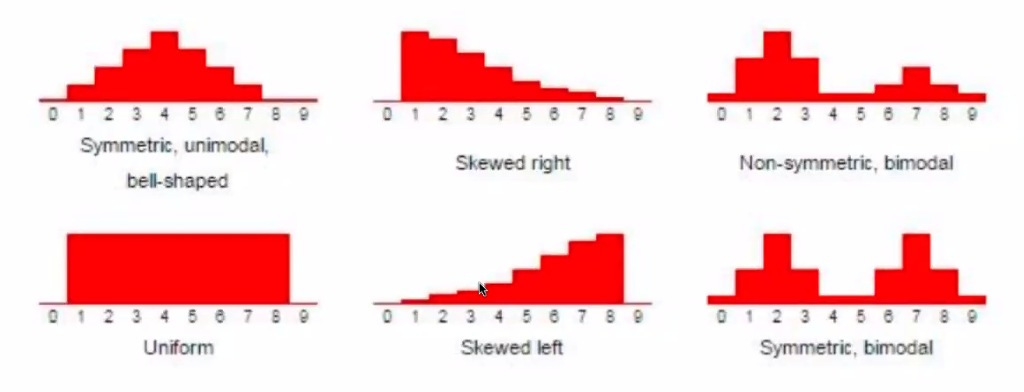

eğer mean mediandan büyükse -->  sağa çekiyor

eğer mean median birbirine eşit (veya eşite yakınsa) --> simetrik

mean median'dan küçükse --> sola çekiyor

mean, verilerin aritmetik ortalaması olduğu için işin içinde değerlerin ağırlığı söz konusudur ve bu yüzden şeklimizi 
şekillendiren değerdir!! median ise tek bir (orta) veridir. dolayısıyla mean'in median'a göre durumuna bakıyoruz, mean küçük 
yani solda kalıyorsa sola skewed olduğunu, sağda kalıyorsa sağa skewed olduğunu söyleyebiliyoruz.

## Rule of thumb:

- If skewness is less than —1 or greater than +1, the distribution is highly skewed.
- If skewness is between —1 and —1/2 or between +1/2 and +1, the distribution is moderately skewed.
- If skewness is between —1/2 and +1/2, the distribution is approximately symmetric.

Reference: https://brownmath.com/stat/shape.html

In [10]:
stats.skew(df1_2021["Ladder score"])

-0.10321590748801858

In [11]:
# Since result for 'Ladder Score is -0.10' we can safely assume that for our sample, ladder scores are approximately symmetric.

## Shape - Kurtosis

Image of Kurtosis

(Skewness bir dağılımın simetrik olmama derecesini ölçerken; kurtosis dağılımın ortasında çok fazla veya çok az örneğin bulunma derecesini gösteren bir indekstir. Eğer skorların çoğu ortalamanın solunda ise ve bu yüzden ortalamadan küçüklerse bu dağılımm pozitif olarak çarpık adlandırılır.)

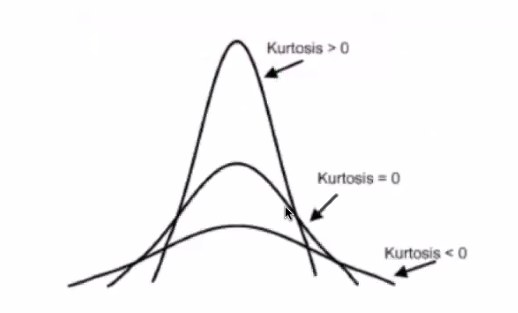

In [12]:
stats.kurtosis(df1_2021["Ladder score"])

-0.39625143860400147

## Rule of thumb:

- If kurtosis is bigger than 0, compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
- In normal distribution, kurtosis is = 0
- If kurtosis is less than 0, Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
Reference: https://brownmath.com/stat/shape.htm

In [14]:
# since result for ladder score is -39 we can assume that central peak is lower than normal and broader, but not a bigger extend

## Ladder Score

### Histogram

<Figure size 2800x2400 with 0 Axes>

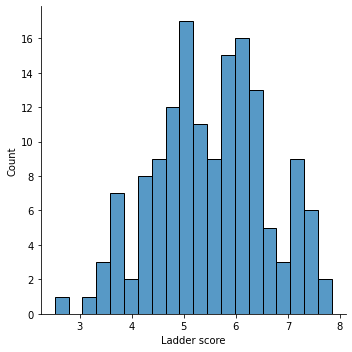

In [22]:
plt.figure(figsize=(14,12), dpi=200)
sns.displot(x="Ladder score", data=df1_2021, bins=20);

Histogram bize %100 istatistiksel bilgiler vermez. Bizler için, Data Scientist olarak buradan yorumlama yapmamıza yarar.

<Figure size 2800x2400 with 0 Axes>

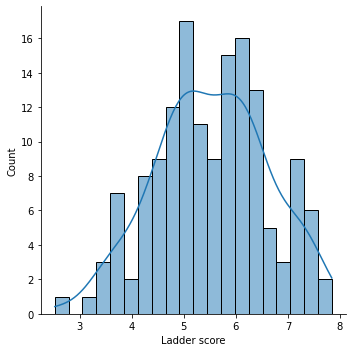

In [21]:
plt.figure(figsize=(14,12), dpi =200)
sns.displot(x='Ladder score', data= df1_2021, bins=20, kde= True);

### KDE

### kdeplot

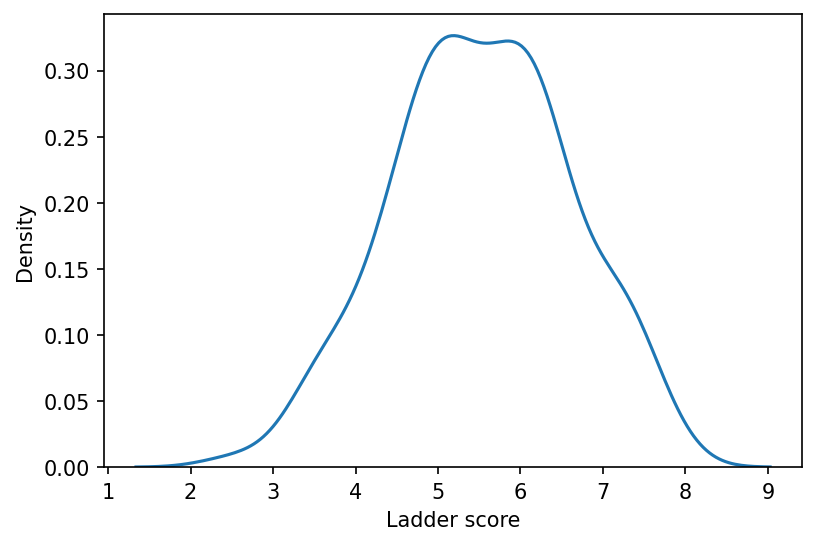

In [20]:
plt.figure(figsize=(6,4), dpi =150)
sns.kdeplot(x='Ladder score', data= df1_2021);

### .displot(....... , kind="kde")

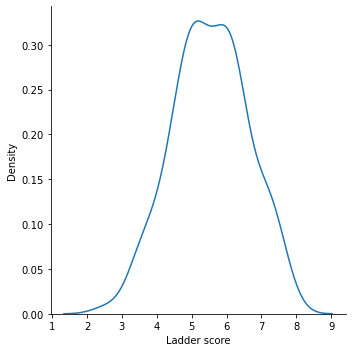

In [23]:
sns.displot(x="Ladder score", data=df1_2021, kind="kde");  # histogramın şeklini verir

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='Ladder score'>

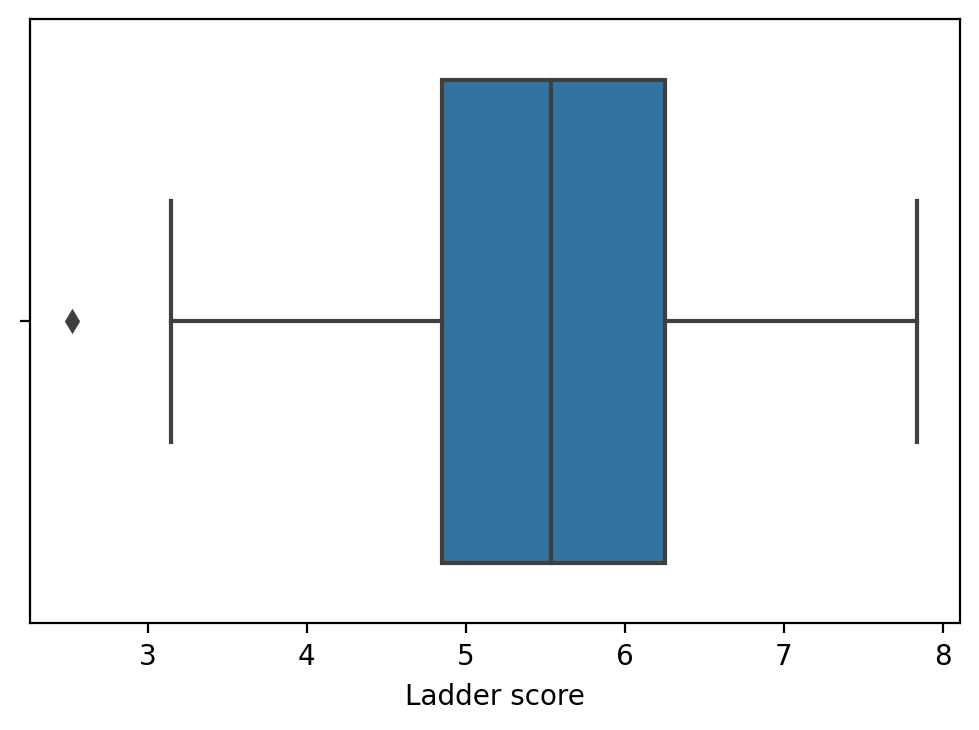

In [26]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(x='Ladder score', data=df1_2021, orient='h')

Demek ki bu çalışmada benim datamda 1.5*IQR kuralımı koyduğumda bir tane outlier ım var.

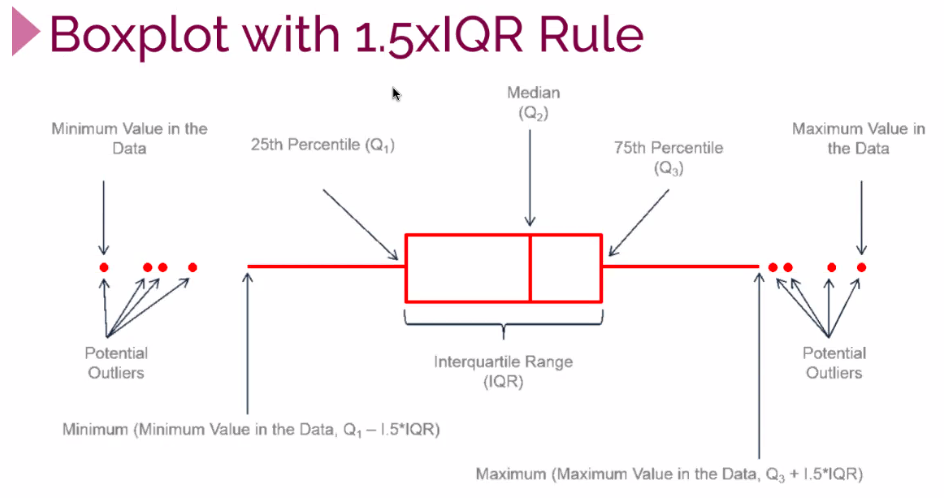

In [27]:
Q1,Q3 = np.percentile(df1_2021["Ladder score"],[25,75])

In [28]:
Q1, Q3

(4.852, 6.255)

In [41]:
np.quantile(df1_2021["Ladder score"],q=[.25,.75])

array([4.852, 6.255])

In [30]:
IQR = Q3 - Q1
IQR

1.4029999999999996

In [31]:
stats.iqr(df1_2021["Ladder score"])

1.4029999999999996

In [33]:
minimum = Q1 - 1.5 * IQR
minimum

2.747500000000001

In [34]:
maximum = Q3 + 1.5 * IQR
maximum

8.359499999999999

In [38]:
potential_outliers = df1_2021[(df1_2021["Ladder score"] < minimum) | (df1_2021["Ladder score"] > maximum)]
potential_outliers

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [43]:
without_outliers = df1_2021[~(df1_2021["Ladder score"] < minimum) | (df1_2021["Ladder score"] > maximum)]
without_outliers.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


<AxesSubplot:xlabel='Ladder score', ylabel='Regional indicator'>

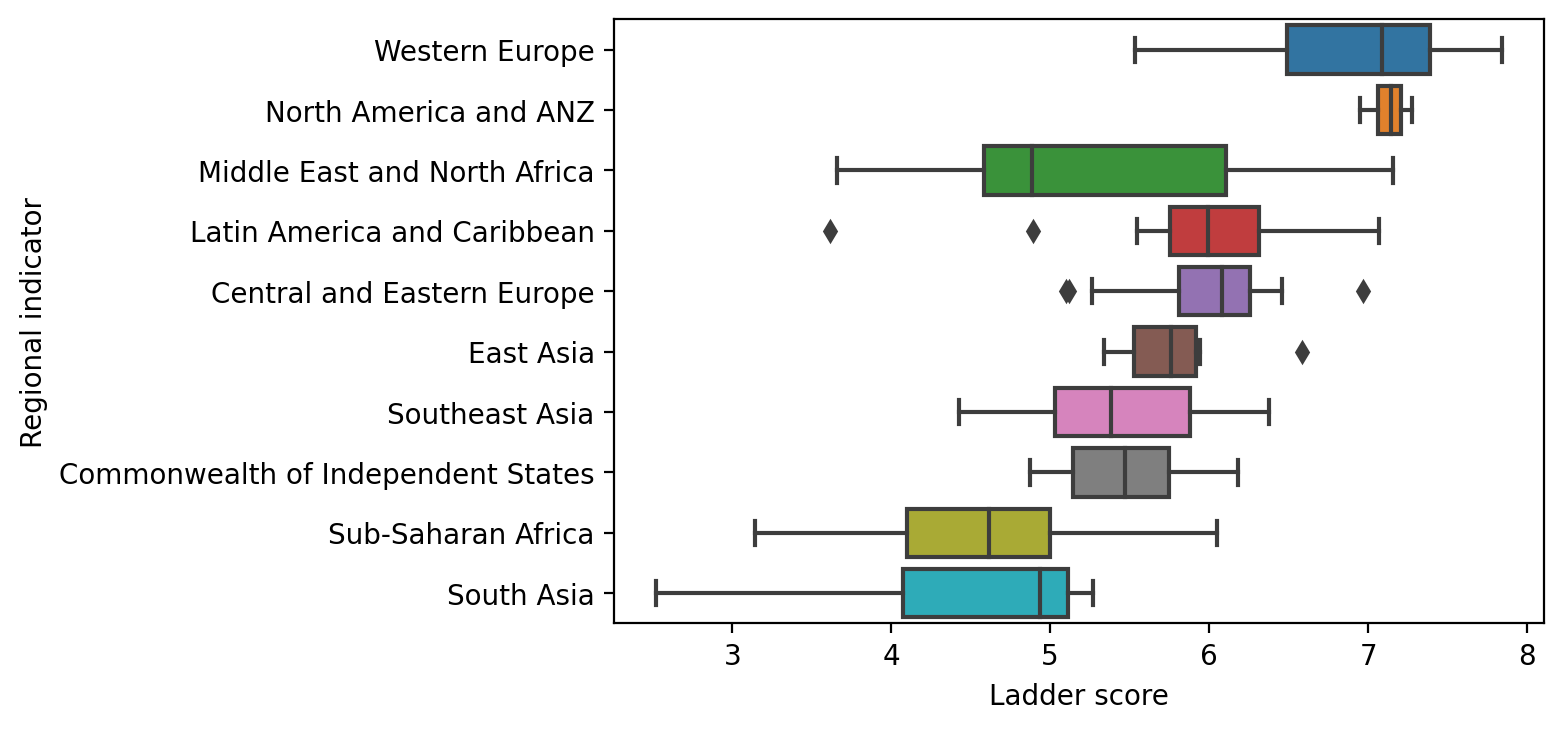

In [45]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(x="Ladder score",y ="Regional indicator", data=df1_2021, orient='h')